# Assignment 2 - s15023

In [1]:
#packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Training dataset


In [2]:
#train dataset
tr = pd.DataFrame(pd.read_csv("train.csv", usecols = ["ID","WPqPCRDiagnosis","Month","Age","WBCcount","Plateletcount","Isolate",
                                                      "Ncount","N","L","PCV","Lcount",'Hospital',"Year","Pastantibiotics",
                                                      "Neckstiffnessad","Final","Sample","ICU","OPD","Sex","Prophylactics",
                                                      "Pasttreatments","Chronicillness","Possibleexposure","Feverad","Headachead",
                                                      "Chillsad","Rigorsad","Musclepainad","Muscletendernessad","Nauseaad","Vomitingadmission",
                                                      "Cnsuffusionad","Skinrashad","Mucosalrashad","Prostrationad","Diarrhoeaad","OliguriaAd",
                                                      "Anuriaad","Jaundicead","Hepatictendernessad","Hepatomegalyad","Spleenimegalyad",
                                                      "Lympadenopathyad","Photophobiaad","Psychoticsymptomsad","Confusionad","Coughad",
                                                      "Haemoptasisad","SOBadd","Chestpainad","Bleedingad","Feveronset","Headacheonset",
                                                      "Musclepainonset","Cnsuffusiononset","Jaundiceonset","Skinrashonset","Oliguriaonset",
                                                      "Anuriaonset","SOBonset","Coughonset","Haemoptasisonset","Chestpainonset","Nauseaonset",
                                                      "Vomitingonset","Diarrhoeaonset","Bleedingonset","Mucosalrashonset","Prostrationonset",
                                                      "Rigorsonset","Photophobiaonset","Chillsonset","Muscletendernessonset","Psychoticsymptomsonset",
                                                      "Confusiononset"]))

### Finding the null values:

In [3]:
# Convert selected values to NaN
selected_variables = ["WPqPCRDiagnosis","Month","Age","WBCcount","Plateletcount","Isolate","Ncount","N","L","PCV","Lcount",
                      'Hospital',"Year","Pastantibiotics","Neckstiffnessad","Sample","ICU","OPD","Sex","Prophylactics",
                      "Pasttreatments","Chronicillness","Possibleexposure","Feverad","Headachead","Chillsad","Rigorsad","Musclepainad",
                      "Muscletendernessad","Nauseaad","Vomitingadmission","Cnsuffusionad","Skinrashad","Mucosalrashad","Prostrationad",
                      "Diarrhoeaad","OliguriaAd","Anuriaad","Jaundicead","Hepatictendernessad","Hepatomegalyad","Spleenimegalyad",
                      "Lympadenopathyad","Photophobiaad","Psychoticsymptomsad","Confusionad","Coughad","Haemoptasisad","SOBadd",
                      "Chestpainad","Bleedingad","Feveronset","Headacheonset","Musclepainonset","Cnsuffusiononset","Jaundiceonset",
                      "Skinrashonset","Oliguriaonset","Anuriaonset","SOBonset","Coughonset","Haemoptasisonset","Chestpainonset",
                      "Nauseaonset","Vomitingonset","Diarrhoeaonset","Bleedingonset","Mucosalrashonset","Prostrationonset",
                      "Rigorsonset","Photophobiaonset","Chillsonset","Muscletendernessonset","Psychoticsymptomsonset","Confusiononset",
                      
                     ]
values_to_replace = [99]
tr[selected_variables] = tr[selected_variables].astype(object)

tr[selected_variables] = tr[selected_variables].replace(values_to_replace, np.nan)

In [4]:
for column in tr.columns:
    tr[column] = pd.Categorical(tr[column])
tr['ID'] =tr['ID'].astype(str)
tr['Age'] = pd.to_numeric(tr['Age'])
tr['WBCcount'] = pd.to_numeric(tr['WBCcount'])
tr['Ncount'] = pd.to_numeric(tr['Ncount'])
tr['N'] = pd.to_numeric(tr['N'])
tr['Lcount'] = pd.to_numeric(tr['Lcount'])
tr['L'] = pd.to_numeric(tr['L'])
tr['Plateletcount'] = pd.to_numeric(tr['Plateletcount'])
tr['PCV'] = pd.to_numeric(tr['PCV'])

### some basic information about the variables:

In [5]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 77 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      1387 non-null   object  
 1   Year                    1387 non-null   category
 2   Month                   1387 non-null   category
 3   Hospital                1387 non-null   category
 4   Sample                  1387 non-null   category
 5   ICU                     1304 non-null   category
 6   OPD                     1304 non-null   category
 7   Sex                     1242 non-null   category
 8   Age                     1217 non-null   float64 
 9   Prophylactics           1084 non-null   category
 10  Pasttreatments          1088 non-null   category
 11  Pastantibiotics         1086 non-null   category
 12  Chronicillness          1068 non-null   category
 13  Possibleexposure        1078 non-null   category
 14  Feveronset              

In [6]:
#Find the duplicates
tr.duplicated().sum()

0

# Data Preprocessing

In [7]:
#mean imputation for numeric variables
imp_var = ["Age","WBCcount","Ncount","N","Lcount","L","Plateletcount","PCV"]

for a in imp_var:
    mean_value = round(tr[a].mean(),0)
    tr[a].fillna(mean_value, inplace=True)

In [8]:
#mode impuation
selected_var = ["WPqPCRDiagnosis","Month","Isolate",
                      'Hospital',"Year","Pastantibiotics","Neckstiffnessad","Sample","ICU","OPD","Sex","Prophylactics",
                      "Pasttreatments","Chronicillness","Possibleexposure","Feverad","Headachead","Chillsad","Rigorsad","Musclepainad",
                      "Muscletendernessad","Nauseaad","Vomitingadmission","Cnsuffusionad","Skinrashad","Mucosalrashad","Prostrationad",
                      "Diarrhoeaad","OliguriaAd","Anuriaad","Jaundicead","Hepatictendernessad","Hepatomegalyad","Spleenimegalyad",
                      "Lympadenopathyad","Photophobiaad","Psychoticsymptomsad","Confusionad","Coughad","Haemoptasisad","SOBadd",
                      "Chestpainad","Bleedingad","Feveronset","Headacheonset","Musclepainonset","Cnsuffusiononset","Jaundiceonset",
                      "Skinrashonset","Oliguriaonset","Anuriaonset","SOBonset","Coughonset","Haemoptasisonset","Chestpainonset",
                      "Nauseaonset","Vomitingonset","Diarrhoeaonset","Bleedingonset","Mucosalrashonset","Prostrationonset",
                      "Rigorsonset","Photophobiaonset","Chillsonset","Muscletendernessonset","Psychoticsymptomsonset","Confusiononset",
                      
                     ]
for var in selected_var:
    mode_value = tr[var].mode()[0]
    tr[var].fillna(mode_value, inplace=True)
na_counts = tr.isna().sum()
print(na_counts)

ID                 0
Year               0
Month              0
Hospital           0
Sample             0
                  ..
Plateletcount      0
PCV                0
WPqPCRDiagnosis    0
Isolate            0
Final              0
Length: 77, dtype: int64


In [9]:
tr['Final'].unique()

[2, 1]
Categories (2, int64): [1, 2]

In [10]:
tr['WPqPCRDiagnosis'].unique()

C:\Users\Isini\anaconda3\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


[3.0, 1.0, 2.0]
Categories (3, float64): [1.0, 2.0, 3.0]

In [11]:
tr['Isolate'].unique()

[2, 98, 1]
Categories (3, int64): [1, 2, 98]

In [12]:
tr['Sample'].unique()

[1, 2]
Categories (2, int64): [1, 2]

# Exploratory data analysis

### Visualising the characteristics of several selected variables

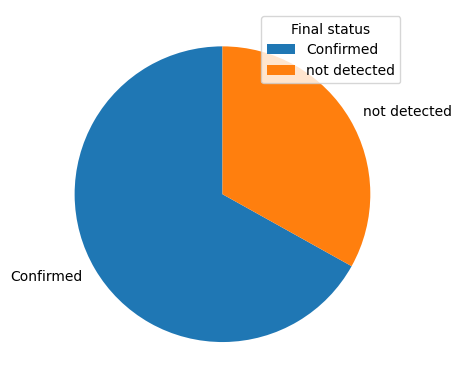

In [13]:
#Response variable - Final
counts = tr['Final'].value_counts()
mylabels = ["Confirmed", "not detected"]

plt.pie(counts, labels = mylabels, startangle = 90)
plt.legend(title='Final status', loc='upper right')
plt.show()

<Axes: xlabel='Final', ylabel='Age'>

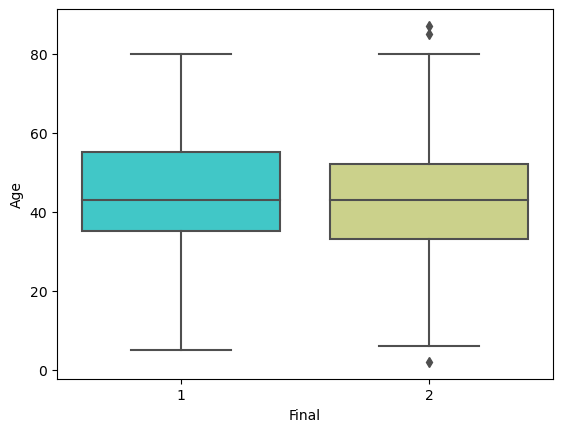

In [14]:
#bosplot for age distribution among the confirmed and non detected respondents.
sns.boxplot(x='Final',y='Age',data=tr,palette='rainbow')

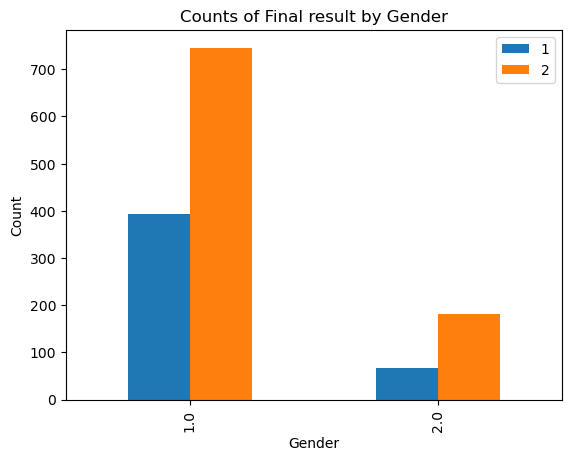

In [15]:
counts = tr.groupby(['Sex', 'Final']).size().unstack()

# Plot the bar chart
ax = counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Counts of Final result by Gender')
ax.legend(loc='upper right')
plt.show()


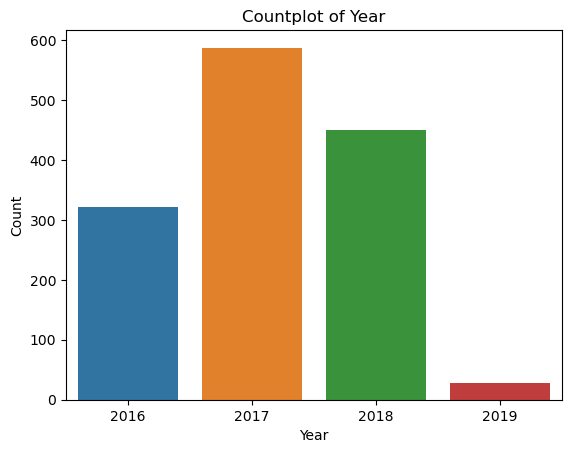

In [16]:
sns.countplot(data=tr, x='Year')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Countplot of Year')

# Display the plot
plt.show()

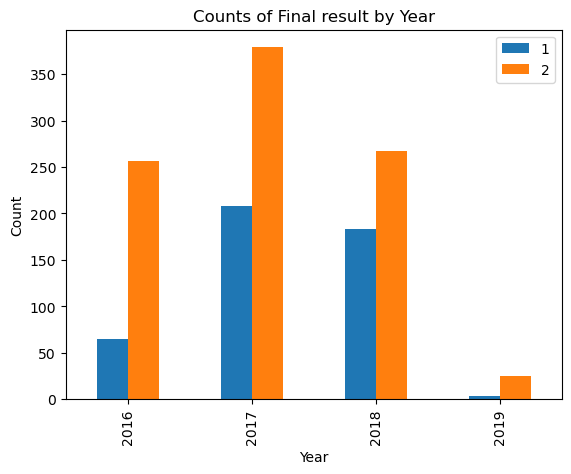

In [17]:
counts = tr.groupby(['Year', 'Final']).size().unstack()

# Plot the bar chart
ax = counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Final result by Year')
ax.legend(loc='upper right')
plt.show()


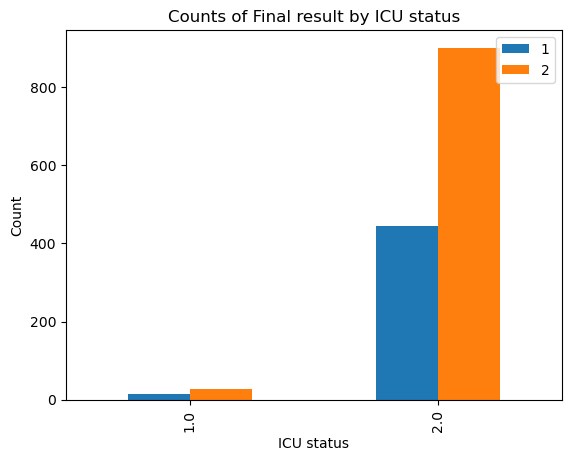

In [18]:
counts = tr.groupby(['ICU', 'Final']).size().unstack()

# Plot the bar chart
ax = counts.plot(kind='bar')
plt.xlabel('ICU status')
plt.ylabel('Count')
plt.title('Counts of Final result by ICU status')
ax.legend(loc='upper right')
plt.show()


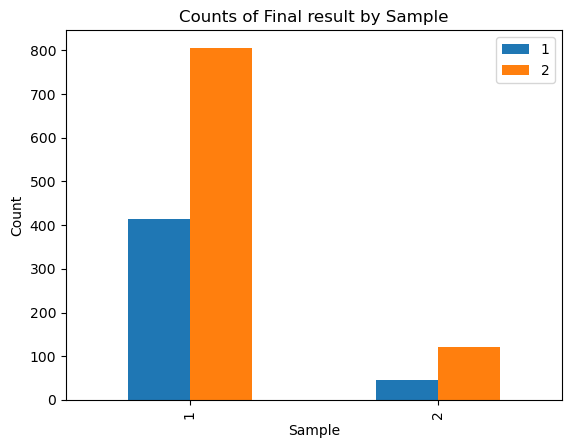

In [19]:
counts = tr.groupby(['Sample', 'Final']).size().unstack()

# Plot the bar chart
ax = counts.plot(kind='bar')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('Counts of Final result by Sample')
ax.legend(loc='upper right')
plt.show()

#### Some descriptive statistics on the numerical variables of the dataset. 

In [20]:
tr.describe()

,Age,WBCcount,Ncount,N,Lcount,L,Plateletcount,PCV
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,42.961067,8526.207642,6177.957462,70.934469,1475.993511,19.995561,180568.747657,38.954232
std,13.926210,4802.290348,3118.178675,11.595584,975.080513,10.960346,117305.072285,4.862454
min,2.000000,1030.000000,500.000000,7.482993,109.000000,0.998279,4300.000000,13.000000
25%,34.000000,5900.000000,4860.000000,71.000000,1100.000000,15.205869,134000.000000,38.500000
50%,43.000000,8526.000000,6178.000000,71.000000,1476.000000,20.000000,180569.000000,39.000000
75%,53.000000,9025.000000,6178.000000,74.864045,1476.000000,20.000000,180569.000000,39.500000
max,87.000000,102000.000000,27900.000000,96.996558,17186.000000,145.251397,980000.000000,90.000000


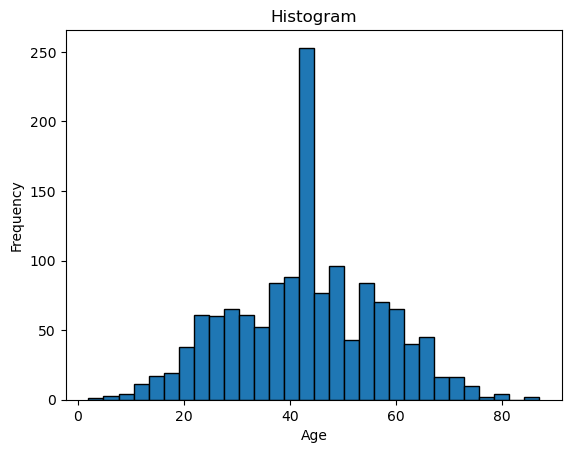

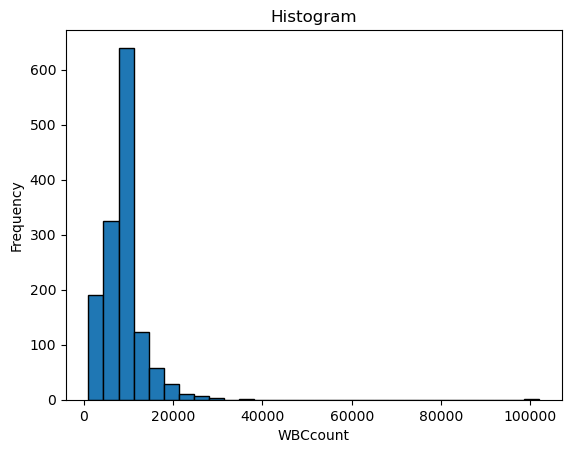

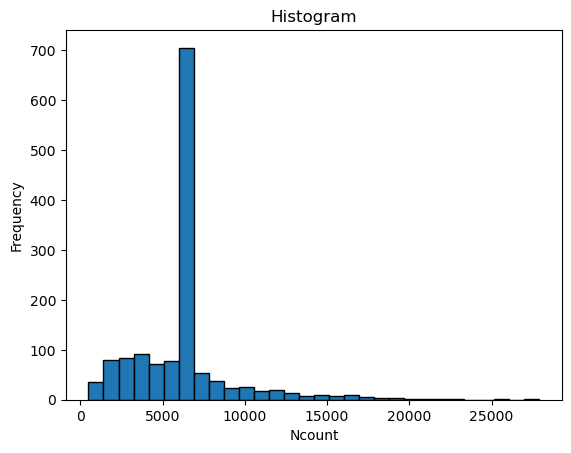

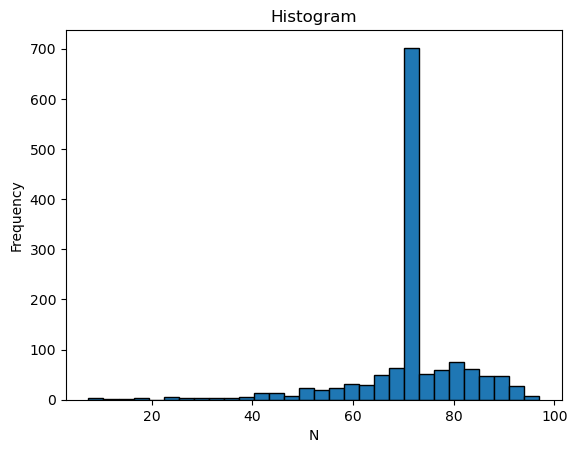

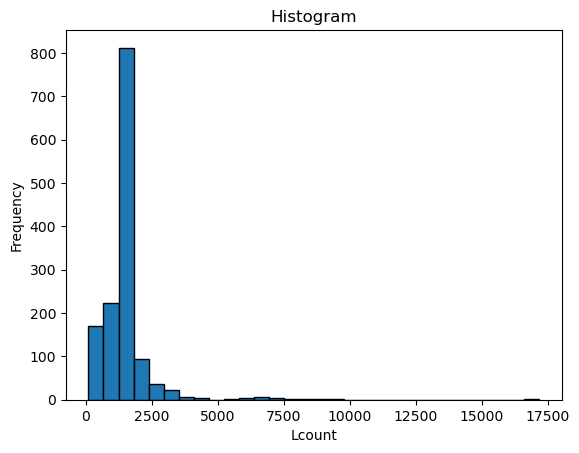

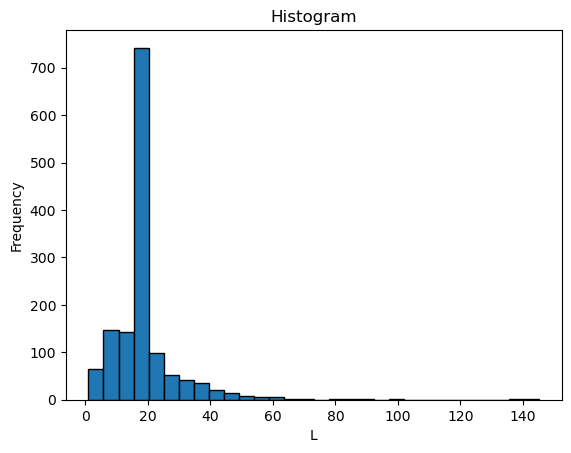

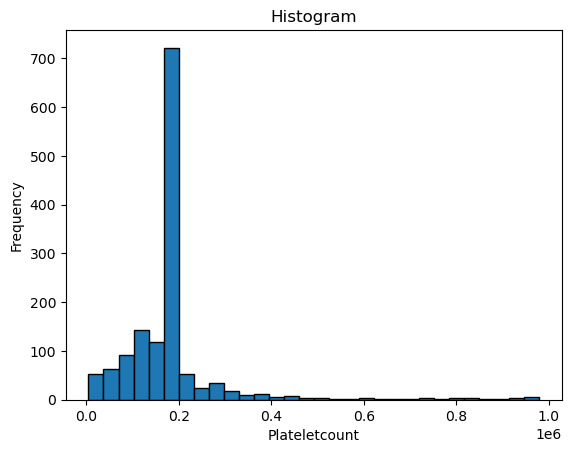

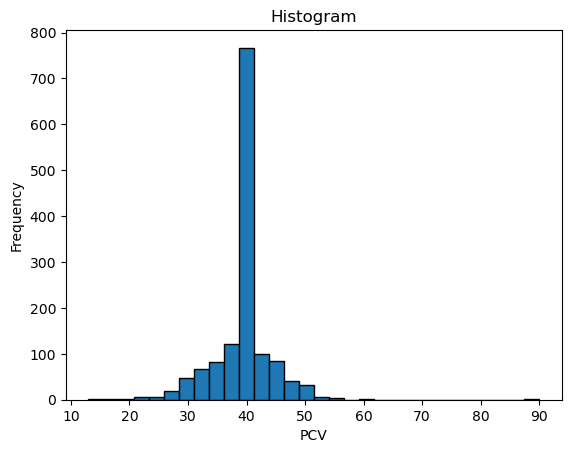

In [21]:
numeric_var = ['Age','WBCcount', 'Ncount','N', 'Lcount', 'L', 'Plateletcount', 'PCV']
for b in numeric_var:
    plt.hist(data=tr, x=b, bins=30, edgecolor='black')
    plt.xlabel(b)
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()


<Axes: >

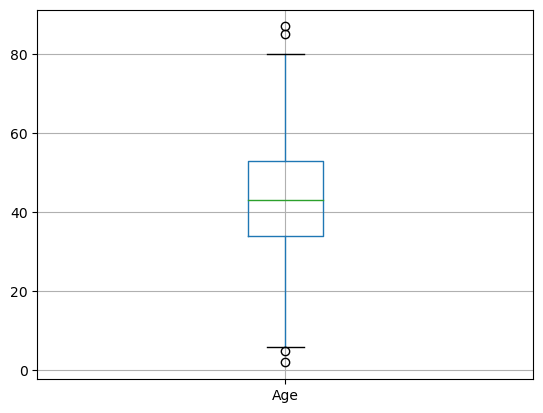

In [22]:
tr[['Age']].boxplot()


#

In [23]:
#creating dummy variables
dummy_df = pd.get_dummies(tr, columns=["WPqPCRDiagnosis","Month","Isolate",
                      'Hospital',"Year","Pastantibiotics","Neckstiffnessad","Sample","ICU","OPD","Sex","Prophylactics",
                      "Pasttreatments","Chronicillness","Possibleexposure","Feverad","Headachead","Chillsad","Rigorsad","Musclepainad",
                      "Muscletendernessad","Nauseaad","Vomitingadmission","Cnsuffusionad","Skinrashad","Mucosalrashad","Prostrationad",
                      "Diarrhoeaad","OliguriaAd","Anuriaad","Jaundicead","Hepatictendernessad","Hepatomegalyad","Spleenimegalyad",
                      "Lympadenopathyad","Photophobiaad","Psychoticsymptomsad","Confusionad","Coughad","Haemoptasisad","SOBadd",
                      "Chestpainad","Bleedingad","Feveronset","Headacheonset","Musclepainonset","Cnsuffusiononset","Jaundiceonset",
                      "Skinrashonset","Oliguriaonset","Anuriaonset","SOBonset","Coughonset","Haemoptasisonset","Chestpainonset",
                      "Nauseaonset","Vomitingonset","Diarrhoeaonset","Bleedingonset","Mucosalrashonset","Prostrationonset",
                      "Rigorsonset","Photophobiaonset","Chillsonset","Muscletendernessonset","Psychoticsymptomsonset","Confusiononset",
                      
                     ])
dummy_df.columns


Index(['ID', 'Age', 'WBCcount', 'Ncount', 'N', 'Lcount', 'L', 'Plateletcount',
       'PCV', 'Final',
       ...
       'Photophobiaonset_1.0', 'Photophobiaonset_2.0', 'Chillsonset_1.0',
       'Chillsonset_2.0', 'Muscletendernessonset_1.0',
       'Muscletendernessonset_2.0', 'Psychoticsymptomsonset_1.0',
       'Psychoticsymptomsonset_2.0', 'Confusiononset_1.0',
       'Confusiononset_2.0'],
      dtype='object', length=166)

In [24]:
y = dummy_df['Final']
x = dummy_df.drop(columns=["Final",'ID'], axis=1)

#### balancing the dataset

In [25]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 42)
x, y = oversample.fit_resample(x, y)

In [26]:
y = pd.DataFrame(y)
y

,Final
0,2
1,1
2,2
3,2
4,2
...,...
1851,1
1852,1
1853,1
1854,1


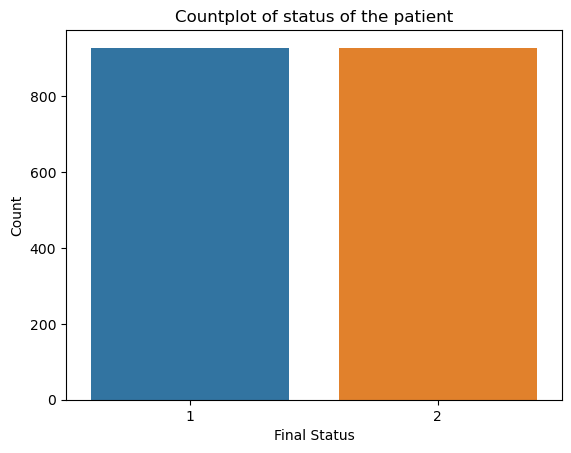

In [27]:
sns.countplot(data=y, x='Final')

# Add labels and title
plt.xlabel('Final Status')
plt.ylabel('Count')
plt.title('Countplot of status of the patient')

# Display the plot
plt.show()

Therefore, the SMOTE technique has made the two categories of the final variable having same no of observations.

# test set


In [28]:
#import test set
#test dataset
tes = pd.DataFrame(pd.read_csv("test.csv", usecols = ["ID","WPqPCRDiagnosis","Month","Age","WBCcount","Plateletcount","Isolate",
                                                      "Ncount","N","L","PCV","Lcount",'Hospital',"Year","Pastantibiotics",
                                                      "Neckstiffnessad","Sample","ICU","OPD","Sex","Prophylactics",
                                                      "Pasttreatments","Chronicillness","Possibleexposure","Feverad","Headachead",
                                                      "Chillsad","Rigorsad","Musclepainad","Muscletendernessad","Nauseaad","Vomitingadmission",
                                                      "Cnsuffusionad","Skinrashad","Mucosalrashad","Prostrationad","Diarrhoeaad","OliguriaAd",
                                                      "Anuriaad","Jaundicead","Hepatictendernessad","Hepatomegalyad","Spleenimegalyad",
                                                      "Lympadenopathyad","Photophobiaad","Psychoticsymptomsad","Confusionad","Coughad",
                                                      "Haemoptasisad","SOBadd","Chestpainad","Bleedingad","Feveronset","Headacheonset",
                                                      "Musclepainonset","Cnsuffusiononset","Jaundiceonset","Skinrashonset","Oliguriaonset",
                                                      "Anuriaonset","SOBonset","Coughonset","Haemoptasisonset","Chestpainonset","Nauseaonset",
                                                      "Vomitingonset","Diarrhoeaonset","Bleedingonset","Mucosalrashonset","Prostrationonset",
                                                      "Rigorsonset","Photophobiaonset","Chillsonset","Muscletendernessonset","Psychoticsymptomsonset",
                                                      "Confusiononset"
                                                     ]))

In [29]:
# Convert selected values to NaN
selected_variables = ["WPqPCRDiagnosis","Month","Age","WBCcount","Plateletcount","Isolate","Ncount","N","L","PCV","Lcount",
                      'Hospital',"Year","Pastantibiotics","Neckstiffnessad","Sample","ICU","OPD","Sex","Prophylactics",
                      "Pasttreatments","Chronicillness","Possibleexposure","Feverad","Headachead","Chillsad","Rigorsad","Musclepainad",
                      "Muscletendernessad","Nauseaad","Vomitingadmission","Cnsuffusionad","Skinrashad","Mucosalrashad","Prostrationad",
                      "Diarrhoeaad","OliguriaAd","Anuriaad","Jaundicead","Hepatictendernessad","Hepatomegalyad","Spleenimegalyad",
                      "Lympadenopathyad","Photophobiaad","Psychoticsymptomsad","Confusionad","Coughad","Haemoptasisad","SOBadd",
                      "Chestpainad","Bleedingad","Feveronset","Headacheonset","Musclepainonset","Cnsuffusiononset","Jaundiceonset",
                      "Skinrashonset","Oliguriaonset","Anuriaonset","SOBonset","Coughonset","Haemoptasisonset","Chestpainonset",
                      "Nauseaonset","Vomitingonset","Diarrhoeaonset","Bleedingonset","Mucosalrashonset","Prostrationonset",
                      "Rigorsonset","Photophobiaonset","Chillsonset","Muscletendernessonset","Psychoticsymptomsonset","Confusiononset",
                     
                     ]
values_to_replace = [99]
tes[selected_variables] =tes[selected_variables].astype(object)

tes[selected_variables] = tes[selected_variables].replace(values_to_replace, np.nan)

#na count
na_counts = tes.isna().sum()
print(na_counts)

ID                   0
Year                 0
Month                0
Hospital             0
Sample               0
                  ... 
L                  166
Plateletcount      167
PCV                170
WPqPCRDiagnosis     47
Isolate              0
Length: 76, dtype: int64


In [30]:
for column in tes.columns:
    tes[column] = pd.Categorical(tes[column])
tes['ID'] = pd.to_numeric(tes['ID'])
tes['Age'] = pd.to_numeric(tes['Age'])
tes['WBCcount'] = pd.to_numeric(tes['WBCcount'])
tes['Ncount'] = pd.to_numeric(tes['Ncount'])
tes['N'] = pd.to_numeric(tes['N'])
tes['Lcount'] = pd.to_numeric(tes['Lcount'])
tes['L'] = pd.to_numeric(tes['L'])
tes['Plateletcount'] = pd.to_numeric(tes['Plateletcount'])
tes['PCV'] = pd.to_numeric(tes['PCV'])

In [31]:
#mean imputation for numeric variables
imp_var = ["Age","WBCcount","Ncount","N","Lcount","L","Plateletcount","PCV"]
for a in imp_var:
    #mean_value = test[a].mean()
    tes[a].fillna(mean_value, inplace=True) 

In [32]:
#mode impuation
selected_var = ["WPqPCRDiagnosis","Month","Isolate",
                      'Hospital',"Year","Pastantibiotics","Neckstiffnessad","Sample","ICU","OPD","Sex","Prophylactics",
                      "Pasttreatments","Chronicillness","Possibleexposure","Feverad","Headachead","Chillsad","Rigorsad","Musclepainad",
                      "Muscletendernessad","Nauseaad","Vomitingadmission","Cnsuffusionad","Skinrashad","Mucosalrashad","Prostrationad",
                      "Diarrhoeaad","OliguriaAd","Anuriaad","Jaundicead","Hepatictendernessad","Hepatomegalyad","Spleenimegalyad",
                      "Lympadenopathyad","Photophobiaad","Psychoticsymptomsad","Confusionad","Coughad","Haemoptasisad","SOBadd",
                      "Chestpainad","Bleedingad","Feveronset","Headacheonset","Musclepainonset","Cnsuffusiononset","Jaundiceonset",
                      "Skinrashonset","Oliguriaonset","Anuriaonset","SOBonset","Coughonset","Haemoptasisonset","Chestpainonset",
                      "Nauseaonset","Vomitingonset","Diarrhoeaonset","Bleedingonset","Mucosalrashonset","Prostrationonset",
                      "Rigorsonset","Photophobiaonset","Chillsonset","Muscletendernessonset","Psychoticsymptomsonset","Confusiononset",
                      
               ]
for var in selected_var:
    #mode_value = tr[var].mode()[0]
    tes[var].fillna(mode_value, inplace=True)
na_counts = tes.isna().sum()
print(na_counts)


ID                 0
Year               0
Month              0
Hospital           0
Sample             0
                  ..
L                  0
Plateletcount      0
PCV                0
WPqPCRDiagnosis    0
Isolate            0
Length: 76, dtype: int64


In [33]:
#creating dummy variables
dummy_df_tes = pd.get_dummies(tes, columns=["WPqPCRDiagnosis","Month","Isolate",
                      'Hospital',"Year","Pastantibiotics","Neckstiffnessad","Sample","ICU","OPD","Sex","Prophylactics",
                      "Pasttreatments","Chronicillness","Possibleexposure","Feverad","Headachead","Chillsad","Rigorsad","Musclepainad",
                      "Muscletendernessad","Nauseaad","Vomitingadmission","Cnsuffusionad","Skinrashad","Mucosalrashad","Prostrationad",
                      "Diarrhoeaad","OliguriaAd","Anuriaad","Jaundicead","Hepatictendernessad","Hepatomegalyad","Spleenimegalyad",
                      "Lympadenopathyad","Photophobiaad","Psychoticsymptomsad","Confusionad","Coughad","Haemoptasisad","SOBadd",
                      "Chestpainad","Bleedingad","Feveronset","Headacheonset","Musclepainonset","Cnsuffusiononset","Jaundiceonset",
                      "Skinrashonset","Oliguriaonset","Anuriaonset","SOBonset","Coughonset","Haemoptasisonset","Chestpainonset",
                      "Nauseaonset","Vomitingonset","Diarrhoeaonset","Bleedingonset","Mucosalrashonset","Prostrationonset",
                      "Rigorsonset","Photophobiaonset","Chillsonset","Muscletendernessonset","Psychoticsymptomsonset","Confusiononset",
                      
                     ])
dummy_df_tes.columns

Index(['ID', 'Age', 'WBCcount', 'Ncount', 'N', 'Lcount', 'L', 'Plateletcount',
       'PCV', 'WPqPCRDiagnosis_1.0',
       ...
       'Photophobiaonset_1.0', 'Photophobiaonset_2.0', 'Chillsonset_1.0',
       'Chillsonset_2.0', 'Muscletendernessonset_1.0',
       'Muscletendernessonset_2.0', 'Psychoticsymptomsonset_1.0',
       'Psychoticsymptomsonset_2.0', 'Confusiononset_1.0',
       'Confusiononset_2.0'],
      dtype='object', length=165)

### 

# Fitting appropriate models


## 1). Logistic regression

In [34]:
#fit a logistic model
logi_model = LogisticRegression(solver='liblinear', random_state=0)

In [35]:
logi_model.fit(x,y)

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [36]:
tes_x = dummy_df_tes.drop('ID', axis=1)
pred_t = pd.DataFrame(logi_model.predict(tes_x), columns=['Final'])
print(pred_t)

     Final
0        2
1        2
2        2
3        1
4        2
..     ...
342      2
343      1
344      1
345      2
346      2

[347 rows x 1 columns]


In [37]:
ID = tes[['ID']]
data = pd.concat([ID,pred_t], axis = 1)
fin_logistic = pd.DataFrame(data)
print(fin_logistic)

      ID  Final
0      1      2
1      2      2
2      3      2
3      4      1
4      5      2
..   ...    ...
342  343      2
343  344      1
344  345      1
345  346      2
346  347      2

[347 rows x 2 columns]


In [38]:
fin_logistic.to_csv("fin_logistic.csv", index= False)

In [39]:
#confusion matrix for thed training values
predtrain = pd.DataFrame(logi_model.predict(x))
from sklearn.metrics import confusion_matrix
cof = confusion_matrix(y, predtrain)
cof

array([[755, 173],
       [ 37, 891]], dtype=int64)

## 

### 2). Random Forest

In [40]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [41]:
rf_model.fit(x,y)

C:\Users\Isini\AppData\Local\Temp\ipykernel_5728\2810146528.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x,y)


RandomForestClassifier(random_state=42)

In [42]:
pred_rf = pd.DataFrame(rf_model.predict(tes_x), columns=['Final'])
print(pred_rf)

     Final
0        2
1        2
2        2
3        2
4        2
..     ...
342      2
343      2
344      2
345      2
346      2

[347 rows x 1 columns]


In [43]:
ID = tes[['ID']]
data = pd.concat([ID,pred_rf], axis = 1)
fin_rf = pd.DataFrame(data)
print(fin_rf)

      ID  Final
0      1      2
1      2      2
2      3      2
3      4      2
4      5      2
..   ...    ...
342  343      2
343  344      2
344  345      2
345  346      2
346  347      2

[347 rows x 2 columns]


In [44]:
fin_rf.to_csv("fin_rf.csv", index= False)

Test Accuracy : 0.83573

### 

### 3). XG Boost

In [45]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [46]:
y_recoded = pd.DataFrame(np.where(y == 1, 0, 1))

recoded_df = pd.concat([y,y_recoded], axis = 1)
recoded_df.head()

,Final,0
0,2,1
1,1,0
2,2,1
3,2,1
4,2,1


In [47]:
y_recoded = recoded_df.iloc[:, 1]
# Train the classifier on the training data
xgb_model.fit(x,y_recoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [48]:
#test set prediction
pred_xgb = pd.DataFrame(xgb_model.predict(tes_x),columns=['Final'])

In [49]:
ID = tes[['ID']]
data = pd.concat([ID,pred_xgb], axis = 1)
fin_pred_xgb = pd.DataFrame(data)
fin_pred_xgb.head()

,ID,Final
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [50]:
fin_pred_xgb.to_csv("fin_pred_xgb.csv", index= False)

In [51]:
# Use the best estimator for predictions and evaluation
predtrain_xgb = pd.DataFrame(xgb_model.predict(x))

#confusion matrix for thed training values
cof_xgb = confusion_matrix(y_recoded, predtrain_xgb)
cof_xgb

array([[776, 152],
       [ 24, 904]], dtype=int64)

Accuracy: 0.1556

# 

### 4) KNN classifier

In [52]:
k = 5  # Choose the number of neighbors (k)
knn_model = KNeighborsClassifier(n_neighbors=k)

In [53]:
knn_model.fit(x, y)

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [54]:
#test set prediction
pred_knn = pd.DataFrame(knn_model.predict(tes_x),columns=['Final'])

In [55]:
ID = tes[['ID']]
data = pd.concat([ID,pred_knn], axis = 1)
fin_pred_knn = pd.DataFrame(data)
fin_pred_knn.head()

,ID,Final
0,1,2
1,2,1
2,3,1
3,4,2
4,5,1


In [56]:
fin_pred_knn.to_csv("fin_pred_knn.csv", index= False)

In [57]:
# Use the best estimator for predictions and evaluation
predtrain_knn = pd.DataFrame(knn_model.predict(x))

#confusion matrix for thed training values
cof_knn = confusion_matrix(y, predtrain_knn)
cof_knn

array([[752, 176],
       [246, 682]], dtype=int64)

Accuracy : 0.40057

#

Therefore, considering all the accuracies of the fitted models, the random forest model performs best.

#### variable importance plot

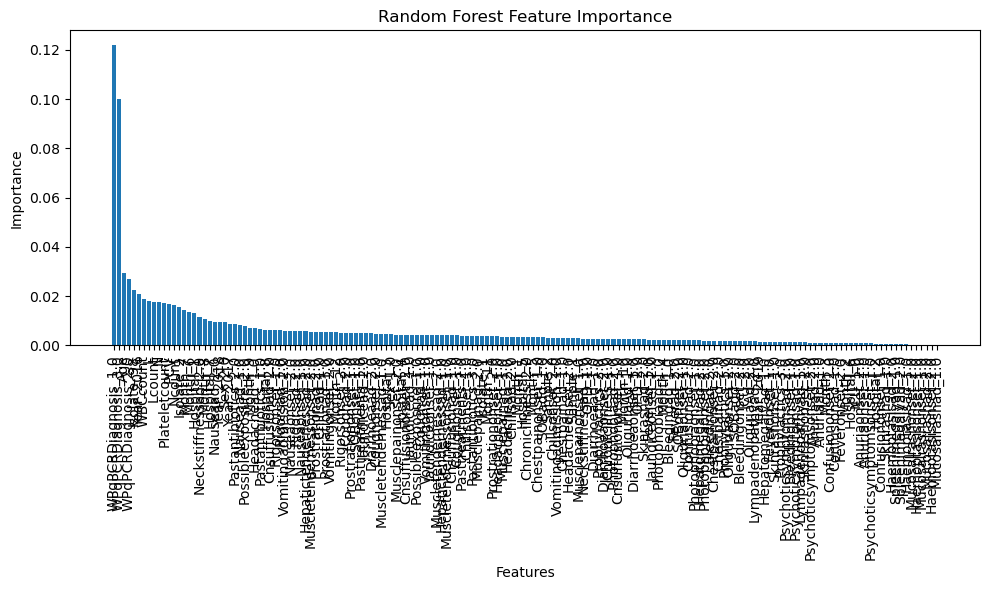

In [58]:

feature_importances = rf_model.feature_importances_
feature_names = x.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(x.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

In [59]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the Top N Most Important Features
top_n = 7  # Number of top features you want to select
top_features = sorted_feature_importance_df.head(top_n)['Feature'].tolist()

print("Top", top_n, "Most Important Features:", top_features)

Top 7 Most Important Features: ['WPqPCRDiagnosis_1.0', 'WPqPCRDiagnosis_3.0', 'Age', 'WPqPCRDiagnosis_2.0', 'Isolate_98', 'Year_2016', 'WBCcount']


Therefore the most important 7 variables are:
    'WPqPCRDiagnosis_1.0'
    'WPqPCRDiagnosis_3.0'
    'Age'
    'WPqPCRDiagnosis_2.0'
    'Isolate_98'
    'Year_2016'
    'WBCcount'

# 

#### For a better accuracy refit the random forest model tunning the hyperparameters to the most important 15 variables

In [60]:
best_x = x[['WPqPCRDiagnosis_1.0', 'WPqPCRDiagnosis_3.0', 'Age', 'WPqPCRDiagnosis_2.0', 'Isolate_98', 'Year_2016', 'WBCcount']]
best_testx = tes_x[['WPqPCRDiagnosis_1.0', 'WPqPCRDiagnosis_3.0', 'Age', 'WPqPCRDiagnosis_2.0', 'Isolate_98', 'Year_2016', 'WBCcount']]

In [62]:
# Define a parameter grid to search through
param_grid_rf = {
    'n_estimators': [1000, 500, 1500],
    'max_depth': [15, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_forest_classifier = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid_rf, cv=3, n_jobs=-1)


In [63]:
# Perform the grid search
grid_search_rf.fit(best_x, y)

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Isini\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [15, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1000, 500, 1500]})

In [64]:
best_params_rf = grid_search_rf.best_params_
best_params_rf

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 500}

In [65]:
best_rf_classifier = grid_search_rf.best_estimator_
best_rf_classifier

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=4,
                       n_estimators=500, random_state=42)

In [68]:
#test set prediction
reduced_pred_rf = pd.DataFrame(best_rf_classifier.predict(best_testx),columns=['Final'])

In [69]:
ID = tes[['ID']]
data = pd.concat([ID,reduced_pred_rf], axis = 1)
fin_reduced_pred_rf = pd.DataFrame(data)
fin_reduced_pred_rf.to_csv("fin_reduced_pred_rf.csv", index= False)

In [70]:
#confusion matrix for thed training values
predtrain_rf = pd.DataFrame(best_rf_classifier.predict(best_x))

from sklearn.metrics import confusion_matrix
cof_rf = confusion_matrix(y, predtrain_rf)
cof_rf

array([[651, 277],
       [  5, 923]], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score
#Train accuracy of the rf model
train_accuracy = accuracy_score(y, predtrain_rf)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.85


In [ ]:
#Test accuracy = 0.83573
#Training Accuracy: 0.85

Therefore the random forest model is good to proceed with 83.57% accuracy level.